DATA IMPORTING

In [1]:
import tensorflow as tf
import numpy as np
import csv
import random
import pandas as pd


from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers
from tensorflow.keras import optimizers
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
data = []

with open('dta_df.csv') as csvfile:
  reader = csv.reader(csvfile)
  next(reader)
  for row in reader:
      triplet = []
      triplet.append(row[0])
      triplet.append(row[1])
      triplet.append(float(row[2]))
      data.append(triplet)
len(data)

23785

In [3]:
data[10]

['CCC1C(=O)N(C2=CN=C(N=C2N1C3CCCC3)NC4=C(C=C(C=C4)C(=O)NC5CCN(CC5)C)OC)C',
 'MKKFFDSRREQGGSGLGSGSSGGGGSTSGLGSGYIGRVFGIGRQQVTVDEVLAEGGFAIVFLVRTSNGMKCALKRMFVNNEHDLQVCKREIQIMRDLSGHKNIVGYIDSSINNVSSGDVWEVLILMDFCRGGQVVNLMNQRLQTGFTENEVLQIFCDTCEAVARLHQCKTPIIHRDLKVENILLHDRGHYVLCDFGSATNKFQNPQTEGVNAVEDEIKKYTTLSYRAPEMVNLYSGKIITTKADIWALGCLLYKLCYFTLPFGESQVAICDGNFTIPDNSRYSQDMHCLIRYMLEPDPDKRPDIYQVSYFSFKLLKKECPIPNVQNSPIPAKLPEPVKASEAAAKKTQPKARLTDPIPTTETSIAPRQRPKAGQTQPNPGILPIQPALTPRKRATVQPPPQAAGSSNQPGLLASVPQPKPQAPPSQPLPQTQAKQPQAPPTPQQTPSTQAQGLPAQAQATPQHQQQLFLKQQQQQQQPPPAQQQPAGTFYQQQQAQTQQFQAVHPATQKPAIAQFPVVSQGGSQQQLMQNFYQQQQQQQQQQQQQQLATALHQQQLMTQQAALQQKPTMAAGQQPQPQPAAAPQPAPAQEPAIQAPVRQQPKVQTTPPPAVQGQKVGSLTPPSSPKTQRAGHRRILSDVTHSAVFGVPASKSTQLLQAAAAEASLNKSKSATTTPSGSPRTSQQNVYNPSEGSTWNPFDDDNFSKLTAEELLNKDFAKLGEGKHPEKLGGSAESLIPGFQSTQGDAFATTSFSAGTAEKRKGGQTVDSGLPLLSVSDPFIPLQVPDAPEKLIEGLKSPDTSLLLPDLLPMTDPFGSTSDAVIEKADVAVESLIPGLEPPVPQRLPSQTESVTSNRTDSLTGEDSLLDCSLLSNPTTDLLEEFAPTAISAPVHKAAEDSNLISGFDVPEGSDKVAEDEFDPIPV

In [4]:
smiles = []
proteins = []
labels = []
random.shuffle(data)

for triplet in range(len(data)):
  smiles.append(data[triplet][0])
  proteins.append(data[triplet][1])
  labels.append(data[triplet][2])

In [5]:
print(smiles[10])
print(proteins[10])
print(labels[10])

CC1=CC(=C(C=C1)F)NC(=O)NC2=CC=C(C=C2)C3=C4C(=CC=C3)NN=C4N
MCFSFIMPPAMADILDIWAVDSQIASDGSIPVDFLLPTGIYIQLEVPREATISYIKQMLWKQVHNYPMFNLLMDIDSYMFACVNQTAVYEELEDETRRLCDVRPFLPVLKLVTRSCDPGEKLDSKIGVLIGKGLHEFDSLKDPEVNEFRRKMRKFSEEKILSLVGLSWMDWLKQTYPPEHEPSIPENLEDKLYGGKLIVAVHFENCQDVFSFQVSPNMNPIKVNELAIQKRLTIHGKEDEVSPYDYVLQVSGRVEYVFGDHPLIQFQYIRNCVMNRALPHFILVECCKIKKMYEQEMIAIEAAINRNSSNLPLPLPPKKTRIISHVWENNNPFQIVLVKGNKLNTEETVKVHVRAGLFHGTELLCKTIVSSEVSGKNDHIWNEPLEFDINICDLPRMARLCFAVYAVLDKVKTKKSTKTINPSKYQTIRKAGKVHYPVAWVNTMVFDFKGQLRTGDIILHSWSSFPDELEEMLNPMGTVQTNPYTENATALHVKFPENKKQPYYYPPFDKIIEKAAEIASSDSANVSSRGGKKFLPVLKEILDRDPLSQLCENEMDLIWTLRQDCREIFPQSLPKLLLSIKWNKLEDVAQLQALLQIWPKLPPREALELLDFNYPDQYVREYAVGCLRQMSDEELSQYLLQLVQVLKYEPFLDCALSRFLLERALGNRRIGQFLFWHLRSEVHIPAVSVQFGVILEAYCRGSVGHMKVLSKQVEALNKLKTLNSLIKLNAVKLNRAKGKEAMHTCLKQSAYREALSDLQSPLNPCVILSELYVEKCKYMDSKMKPLWLVYNNKVFGEDSVGVIFKNGDDLRQDMLTLQMLRLMDLLWKEAGLDLRMLPYGCLATGDRSGLIEVVSTSETIADIQLNSSNVAAAAAFNKDALLNWLKEYNSGDDLDRAIEEFTLSCAGYCVASYVLGIGDRHSDNIMVKKTGQLFHIDFGHIL

In [7]:
split = int(0.9 * len(smiles))
train_smiles = smiles[:split]
test_smiles = smiles[split:]
train_proteins = proteins[:split]
test_proteins = proteins[split:]
train_labels = labels[:split]
test_labels = labels[split:]

In [8]:
tokenizer_smiles = Tokenizer(char_level = True)
tokenizer_smiles.fit_on_texts(train_smiles)

word_index_smiles = tokenizer_smiles.word_index
vocab_size_smiles = len(word_index_smiles)

train_sequences_smiles = tokenizer_smiles.texts_to_sequences(train_smiles)
train_padded_smiles = pad_sequences(train_sequences_smiles, truncating = "post", padding = "post", maxlen = 85)

test_sequences_smiles = tokenizer_smiles.texts_to_sequences(test_smiles)
test_padded_smiles = pad_sequences(test_sequences_smiles, truncating = "post", padding = "post", maxlen = 85)

In [9]:
tokenizer_proteins = Tokenizer(char_level = True)
tokenizer_proteins.fit_on_texts(train_proteins)

word_index_proteins = tokenizer_proteins.word_index
vocab_size_proteins = len(word_index_proteins)

train_sequences_proteins = tokenizer_proteins.texts_to_sequences(train_proteins)
train_padded_proteins = pad_sequences(train_sequences_proteins, truncating = "post", padding = "post", maxlen = 1200)

test_sequences_proteins = tokenizer_proteins.texts_to_sequences(test_proteins)
test_padded_proteins = pad_sequences(test_sequences_proteins, truncating = "post", padding = "post", maxlen = 1200)

In [10]:
print(vocab_size_smiles)
print(vocab_size_proteins)

22
20


In [11]:
train_smiles_array = np.array(train_padded_smiles)
test_smiles_array = np.array(test_padded_smiles)
train_proteins_array = np.array(train_padded_proteins)
test_proteins_array = np.array(test_padded_proteins)
train_labels_array = np.array(train_labels, dtype = "float32")
test_labels_array = np.array(test_labels, dtype = "float32")

print(f"Train smiles array shape: {train_smiles_array.shape}")
print(f"Test smiles array shape: {test_smiles_array.shape}")
print(f"Train proteins array shape: {train_proteins_array.shape}")
print(f"Test proteins array shape: {test_proteins_array.shape}")
print(f"Train labels array shape: {train_labels_array.shape}")
print(f"Test labels array shape: {test_labels_array.shape}")

Train smiles array shape: (21406, 85)
Test smiles array shape: (2379, 85)
Train proteins array shape: (21406, 1200)
Test proteins array shape: (2379, 1200)
Train labels array shape: (21406,)
Test labels array shape: (2379,)


MODEL

In [12]:
from tensorflow.keras.layers import Input, Embedding, Conv1D, MaxPooling1D, LSTM, Concatenate, Dense, Dropout
from tensorflow.keras.models import Model

# Define two input layers
smile_input = Input(shape=(85,))
protein_input = Input(shape=(1200,))

# Embedding layers for SMILES and proteins
embedding_dim = 128
smile_embedding = Embedding(vocab_size_smiles + 1, embedding_dim)(smile_input)
protein_embedding = Embedding(vocab_size_proteins + 1, embedding_dim)(protein_input)

# Convolutional layers for SMILES and proteins
num_filters = 64
filter_sizes = [4, 8, 12]

conv_smile_layers = []
conv_protein_layers = []

for filter_size in filter_sizes:
    conv_smile = Conv1D(num_filters, filter_size, activation='relu')(smile_embedding)
    pool_smile = MaxPooling1D(2)(conv_smile)
    conv_smile_layers.append(pool_smile)

    conv_protein = Conv1D(num_filters, filter_size, activation='relu')(protein_embedding)
    pool_protein = MaxPooling1D(2)(conv_protein)
    conv_protein_layers.append(pool_protein)

# Concatenate convolutional outputs
concatenated_conv_smile = Concatenate(axis=1)(conv_smile_layers)
concatenated_conv_protein = Concatenate(axis=1)(conv_protein_layers)

# LSTM layers for concatenated convolutional outputs
lstm_units = 64
lstm_smile = LSTM(lstm_units)(concatenated_conv_smile)
lstm_protein = LSTM(lstm_units)(concatenated_conv_protein)

# Concatenate LSTM outputs
merged_features = Concatenate()([lstm_smile, lstm_protein])

# Dense layers
dense_units = 256
output = Dense(dense_units, activation='relu')(merged_features)
output = Dropout(0.2)(output)
output = Dense(dense_units, activation='relu')(output)
output = Dropout(0.2)(output)
output = Dense(1)(output)

# # Create the model
# model = Model(inputs=[smile_input, protein_input], outputs=output)

# # Compile the model
# optimizer = optimizers.Adam(learning_rate=0.001)
# model.compile(loss='mse', optimizer=optimizer, metrics=['mse'])

# # Print model summary
# # model.summary()


In [18]:
import numpy as np
from sklearn.model_selection import KFold

# Define the number of folds for cross-validation
num_folds = 5  # You can adjust this number as needed

# Initialize lists to store the evaluation results for each fold
mse_scores = []

# Create a KFold object
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Split your data into training and validation sets for each fold
for train_index, val_index in kf.split(train_smiles_array, train_proteins_array):
    # Split the data into training and validation sets for this fold
    X_train_fold_smiles, X_val_fold_smiles = train_smiles_array[train_index], train_smiles_array[val_index]
    X_train_fold_proteins, X_val_fold_proteins = train_proteins_array[train_index], train_proteins_array[val_index]
    y_train_fold, y_val_fold = train_labels_array[train_index], train_labels_array[val_index]

    # Create and compile the model (you can optionally reset the model here if needed)
    optimizer = optimizers.Adam(learning_rate = 0.001)
    model = Model(inputs=[smile_input, protein_input], outputs=output)
    model.compile(loss='mse', optimizer=optimizer, metrics=['mse'])

    # Train the model on the current fold
    history = model.fit([X_train_fold_smiles, X_train_fold_proteins], y_train_fold,
                        epochs=100, batch_size=256, validation_data=([X_val_fold_smiles, X_val_fold_proteins], y_val_fold))

    # Evaluate the model on the validation set for this fold
    val_loss = model.evaluate([X_val_fold_smiles, X_val_fold_proteins], y_val_fold, verbose=0)

    # Append the validation MSE score to the list
    mse_scores.append(val_loss[1])

# Calculate the mean and standard deviation of MSE scores across all folds
mean_mse = np.mean(mse_scores)
std_mse = np.std(mse_scores)

# Print the cross-validation results
print(f"Mean MSE: {mean_mse}")
print(f"Std Dev MSE: {std_mse}")


Epoch 1/100
67/67 [==============================] - 45s 339ms/step - loss: 3.7743 - mse: 3.7743 - val_loss: 0.7012 - val_mse: 0.7012
Epoch 2/100
67/67 [==============================] - 17s 248ms/step - loss: 0.8349 - mse: 0.8349 - val_loss: 0.6352 - val_mse: 0.6352
Epoch 3/100
67/67 [==============================] - 16s 243ms/step - loss: 0.7909 - mse: 0.7909 - val_loss: 0.6304 - val_mse: 0.6304
Epoch 4/100
67/67 [==============================] - 16s 242ms/step - loss: 0.7441 - mse: 0.7441 - val_loss: 0.5811 - val_mse: 0.5811
Epoch 5/100
67/67 [==============================] - 16s 242ms/step - loss: 0.6937 - mse: 0.6937 - val_loss: 0.6199 - val_mse: 0.6199
Epoch 6/100
67/67 [==============================] - 16s 244ms/step - loss: 0.6637 - mse: 0.6637 - val_loss: 0.5241 - val_mse: 0.5241
Epoch 7/100
67/67 [==============================] - 16s 244ms/step - loss: 0.6526 - mse: 0.6526 - val_loss: 0.5313 - val_mse: 0.5313
Epoch 8/100
67/67 [==============================] - 16s 244ms

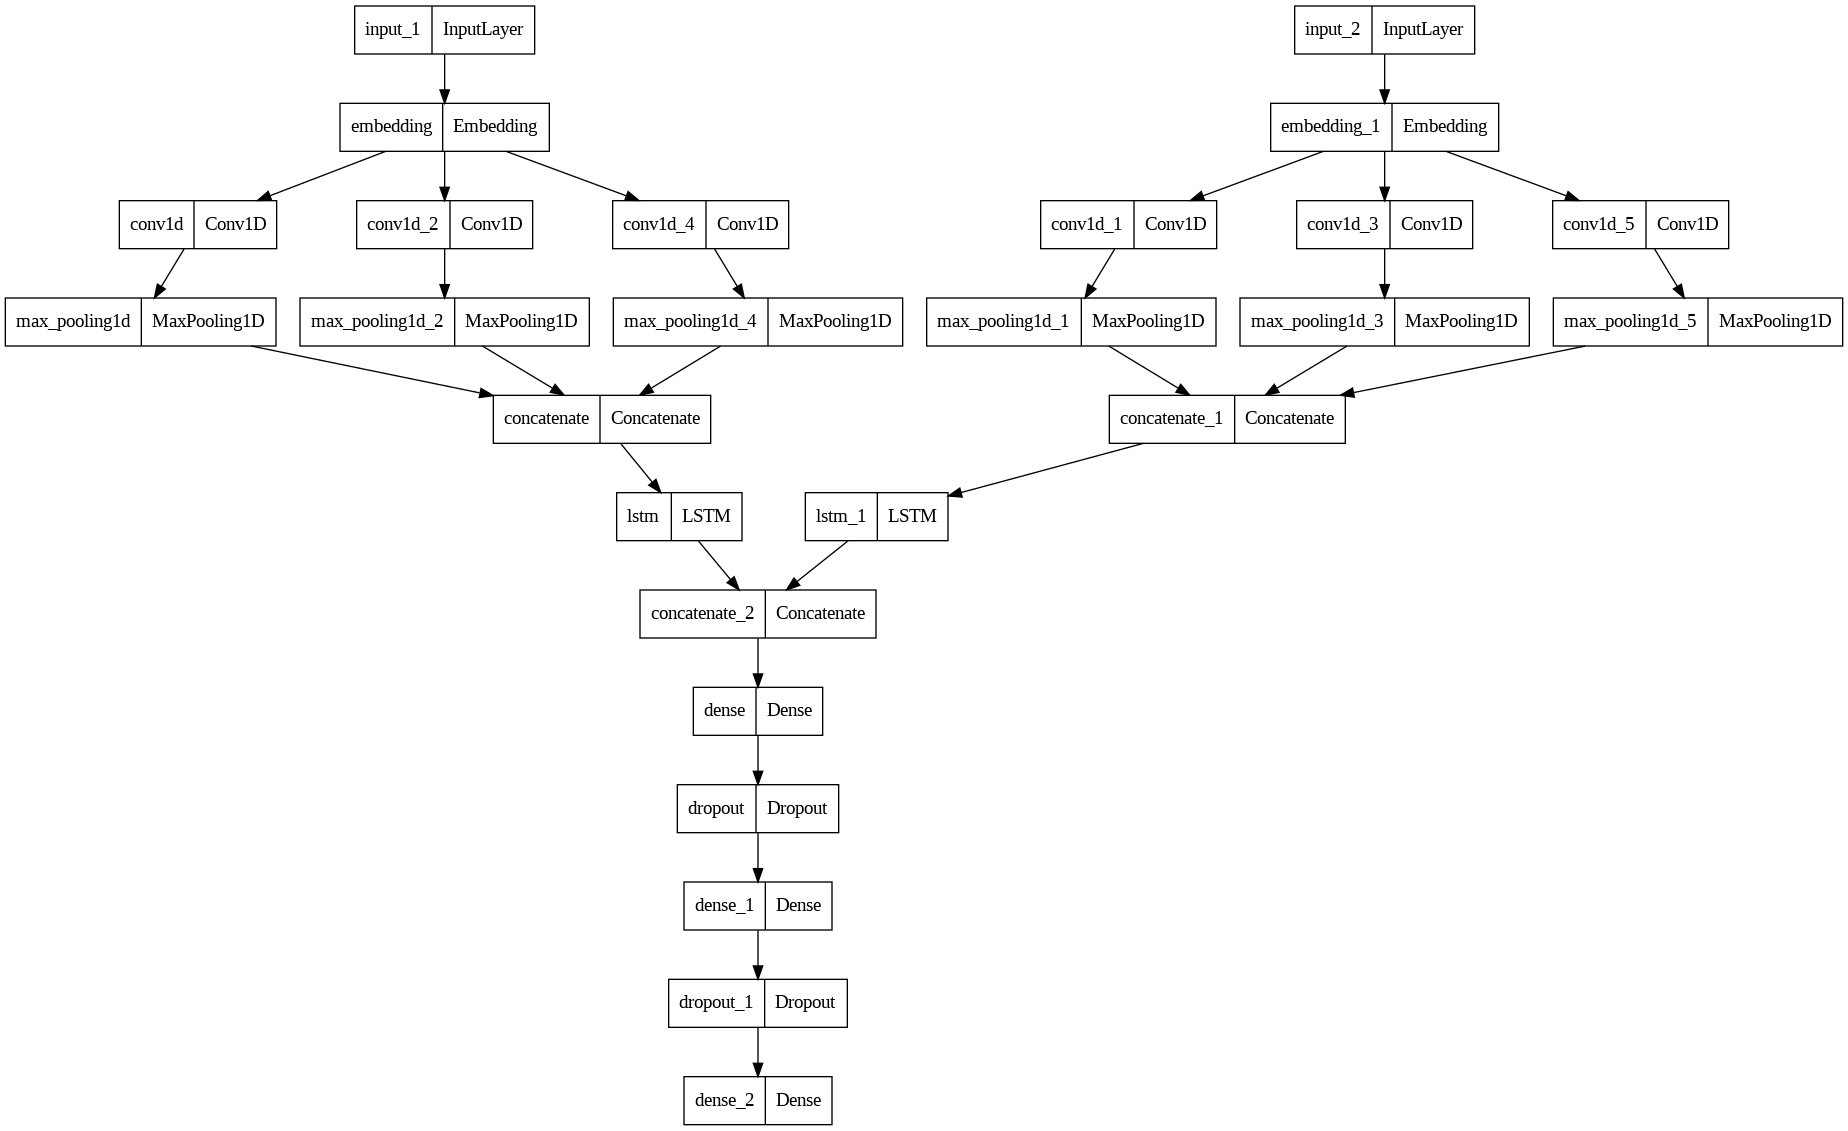

In [19]:
tf.keras.utils.plot_model(model)

In [ ]:
# from tensorflow.keras.callbacks import EarlyStopping

# # early_stopping = EarlyStopping(
# #     min_delta=0.001,
# #     patience=10,
# #     restore_best_weights=True,
# # )

# history = model.fit([train_smiles_array, train_proteins_array], train_labels_array,
#                     epochs = 100, batch_size = 256, validation_data = ([test_smiles_array, test_proteins_array], test_labels_array))

<Figure size 640x480 with 0 Axes>

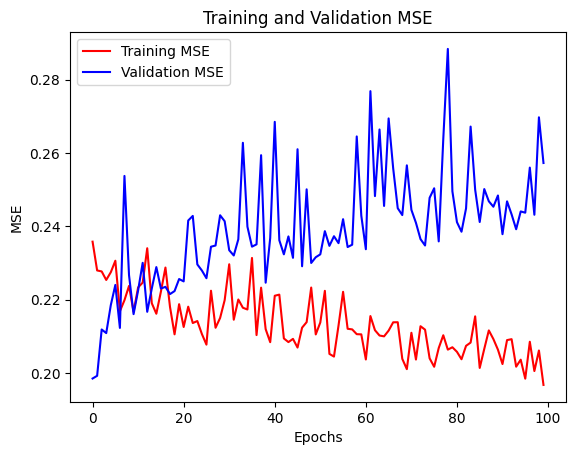

<Figure size 640x480 with 0 Axes>

In [20]:
import matplotlib.pyplot as plt

mse=history.history['mse']
val_mse=history.history['val_mse']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(mse))

plt.plot(epochs, mse, 'r')
plt.plot(epochs, val_mse, 'b')
plt.title('Training and Validation MSE')
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.legend(["Training MSE", "Validation MSE"])

plt.figure()

In [21]:
def predict_pKd(drug, protein):
  drug_sequence = tokenizer_smiles.texts_to_sequences([drug])
  drug_padded = pad_sequences(drug_sequence, truncating = "post", padding = "post", maxlen = 85)
  protein_sequence = tokenizer_proteins.texts_to_sequences([protein])
  protein_padded = pad_sequences(protein_sequence, truncating = "post", padding = "post", maxlen = 1200)
  prediction = model.predict([tf.expand_dims(drug_padded, axis = -1), tf.expand_dims(protein_padded, axis = -1)])

  return(prediction.item())

In [22]:
drug = test_smiles[31]
protein = test_proteins[531]
label = test_labels[1531]

print(label)
predict_pKd(drug = drug, protein = protein)

5.0
1/1 [==============================] - 2s 2s/step


5.226375579833984

75/75 [==============================] - 3s 29ms/step


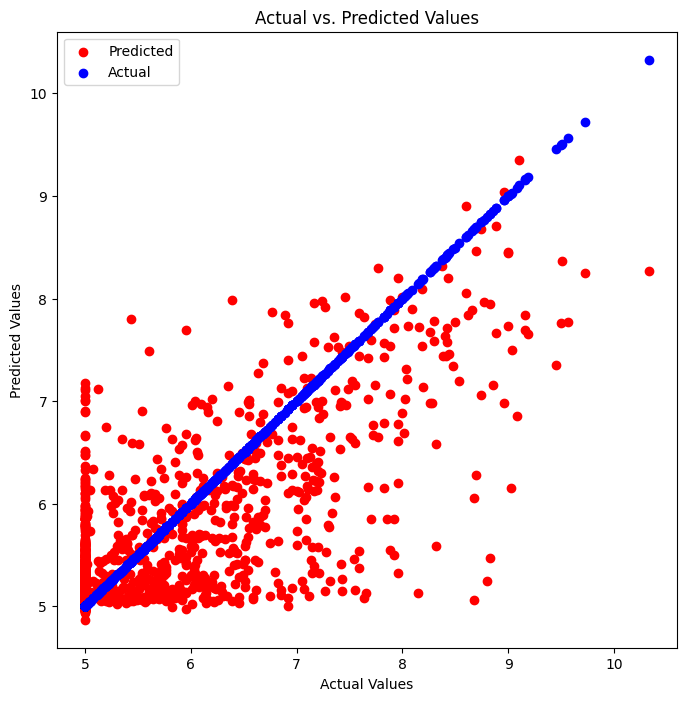

In [23]:
import matplotlib.pyplot as plt

# Make predictions on the test data
predictions = model.predict([test_smiles_array, test_proteins_array])

# Plot the actual values in blue and the predicted values in red
plt.figure(figsize=(8, 8))
plt.scatter(test_labels_array, predictions, c='red', label='Predicted')
plt.scatter(test_labels_array, test_labels_array, c='blue', label='Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()
